<a href="https://colab.research.google.com/github/AmruthaSri852/AmruthaSri852/blob/main/Parallel_Computing_20103011.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 01 - 23rd August 2022

### Object 01

In [ ]:
# !pip install seaborn
# !pip install plotly
# !pip install matplot
# !pip install pandas
!pip install numpy

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import openpyxl

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Parallel Computer Lab(20103011)/Covid 19 dataset - covid_19_clean_complete.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24366 entries, 0 to 24365
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  7440 non-null   object 
 1   Country/Region  24366 non-null  object 
 2   Lat             24366 non-null  float64
 3   Long            24366 non-null  float64
 4   Date            24366 non-null  object 
 5   Confirmed       24366 non-null  int64  
 6   Deaths          24366 non-null  int64  
 7   Recovered       24366 non-null  int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 1.5+ MB


In [ ]:
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.0000,65.0000,1/22/20,0,0,0
1,NaN,Albania,41.1533,20.1683,1/22/20,0,0,0
2,NaN,Algeria,28.0339,1.6596,1/22/20,0,0,0
3,NaN,Andorra,42.5063,1.5218,1/22/20,0,0,0
4,NaN,Angola,-11.2027,17.8739,1/22/20,0,0,0


In [ ]:
df.rename(columns={"Province/State":"state","Country/Region":"country"},inplace=True)

In [ ]:
df.head()

,state,country,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.0000,65.0000,1/22/20,0,0,0
1,NaN,Albania,41.1533,20.1683,1/22/20,0,0,0
2,NaN,Algeria,28.0339,1.6596,1/22/20,0,0,0
3,NaN,Andorra,42.5063,1.5218,1/22/20,0,0,0
4,NaN,Angola,-11.2027,17.8739,1/22/20,0,0,0


In [ ]:
df['active'] = df['Confirmed'] - df['Deaths'] - df["Recovered"]

In [ ]:
df.tail()

,state,country,Lat,Long,Date,Confirmed,Deaths,Recovered,active
24361,Saint Pierre and Miquelon,France,46.885200,-56.315900,4/23/20,1,0,0,1
24362,NaN,South Sudan,6.877000,31.307000,4/23/20,5,0,0,5
24363,NaN,Western Sahara,24.215500,-12.885800,4/23/20,6,0,5,1
24364,NaN,Sao Tome and Principe,0.186360,6.613081,4/23/20,4,0,0,4
24365,NaN,Yemen,15.552727,48.516388,4/23/20,1,0,0,1


In [ ]:
### Top Countries Data

In [ ]:
df['Date'].max()

'4/9/20'

In [ ]:
top = df[df['Date'] == df['Date'].max()]
top.head()

,state,country,Lat,Long,Date,Confirmed,Deaths,Recovered,active
20436,NaN,Afghanistan,33.0000,65.0000,4/9/20,484,15,32,437
20437,NaN,Albania,41.1533,20.1683,4/9/20,409,23,165,221
20438,NaN,Algeria,28.0339,1.6596,4/9/20,1666,235,347,1084
20439,NaN,Andorra,42.5063,1.5218,4/9/20,583,25,58,500
20440,NaN,Angola,-11.2027,17.8739,4/9/20,19,2,2,15


In [ ]:
world = top.groupby('country')['Confirmed','Recovered','Deaths','active'].sum().reset_index()
world.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,country,Confirmed,Recovered,Deaths,active
0,Afghanistan,484,32,15,437
1,Albania,409,165,23,221
2,Algeria,1666,347,235,1084
3,Andorra,583,58,25,500
4,Angola,19,2,2,15


In [ ]:
len(world)

185

In [ ]:
### Plot on World Map

figure = px.choropleth(world,locations="country",locationmode='country names',color='active',
                       hover_name="country",range_color=[1,1000],color_continuous_scale="agsunset",
                       title = "Country With Active Cases")
figure.show()

In [ ]:
### Plotting Worldwide Confirmed Cases vs Date

In [ ]:
total_confirmed_cases = df.groupby('Date')['Confirmed','Date'].sum().reset_index()
total_confirmed_cases.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Date,Confirmed
0,1/22/20,555
1,1/23/20,654
2,1/24/20,941
3,1/25/20,1434
4,1/26/20,2118


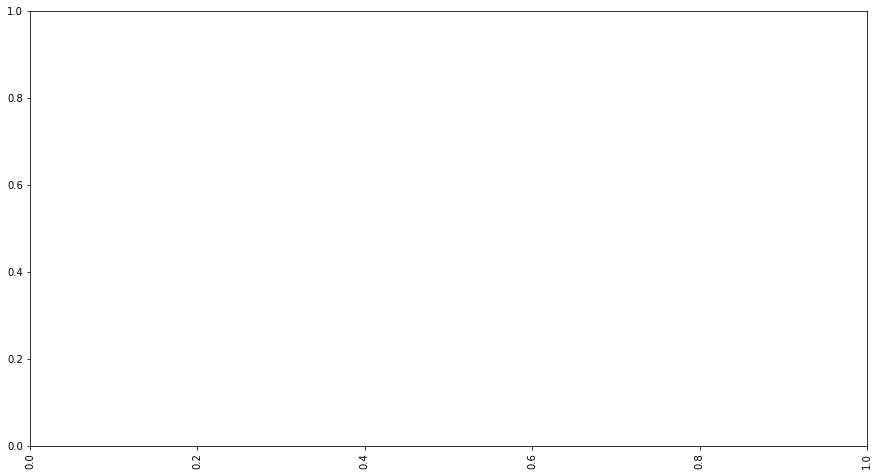

In [ ]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=90,fontsize=10)
# sns.pointplot(total_confirmed_cases['Date'].dt.date,total_confirmed_cases['Confirmed'],color='red')
plt.show()

In [ ]:
### Top 20 Countries having most active cases

In [ ]:
df.head()

,state,country,Lat,Long,Date,Confirmed,Deaths,Recovered,active
0,NaN,Afghanistan,33.0000,65.0000,1/22/20,0,0,0,0
1,NaN,Albania,41.1533,20.1683,1/22/20,0,0,0,0
2,NaN,Algeria,28.0339,1.6596,1/22/20,0,0,0,0
3,NaN,Andorra,42.5063,1.5218,1/22/20,0,0,0,0
4,NaN,Angola,-11.2027,17.8739,1/22/20,0,0,0,0


In [ ]:
top_actives = top.groupby("country")['active'].sum().sort_values(ascending=False).reset_index().head(20)

In [ ]:
top_actives

,country,active
0,US,420826
1,Italy,96877
2,Spain,85610
3,Germany,63167
4,United Kingdom,57520
5,France,51725
6,Turkey,39232
7,Iran,29801
8,Canada,20151
9,Netherlands,19220


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



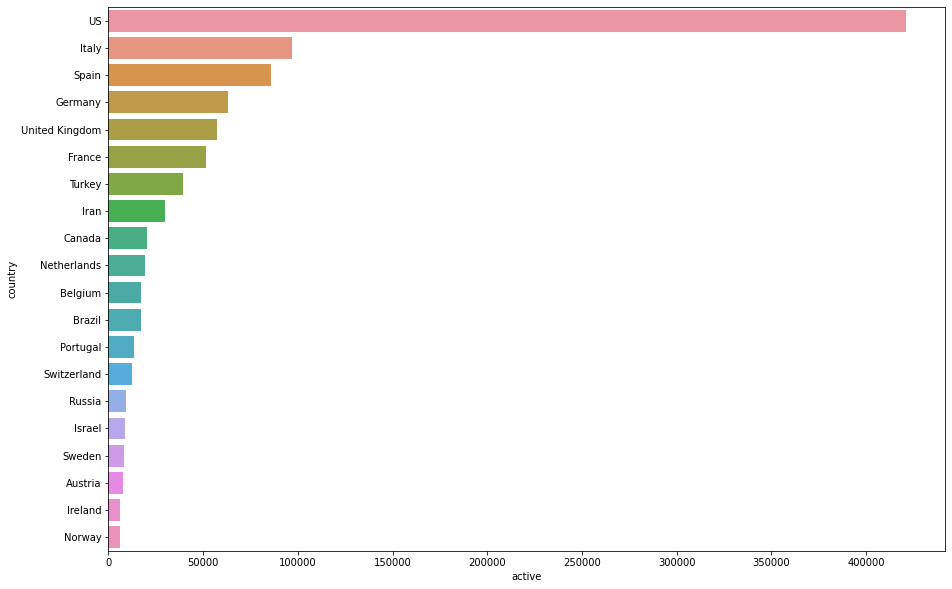

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot(top_actives['active'],top_actives['country'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



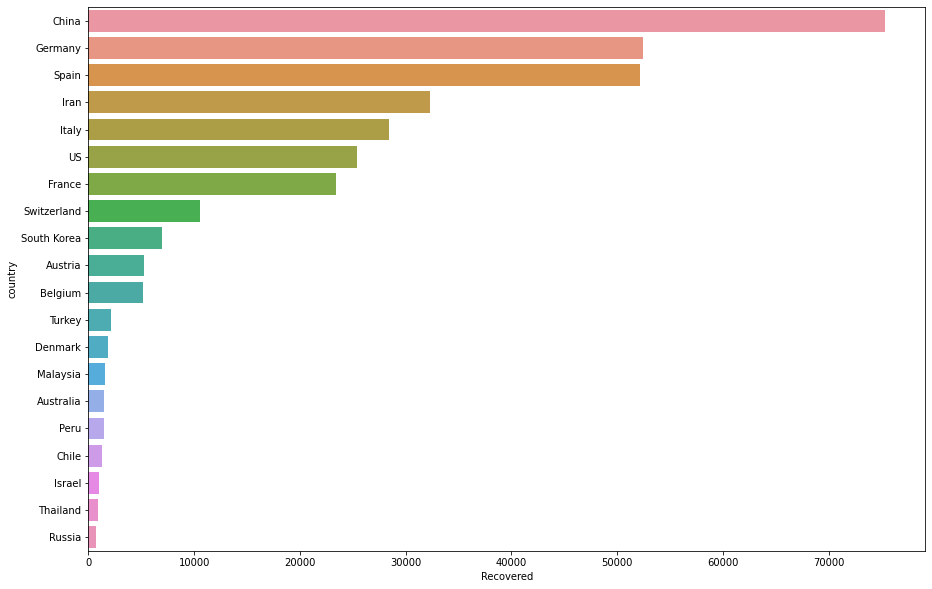

In [ ]:
top_recovered = top.groupby("country")['Recovered'].sum().sort_values(ascending=False).reset_index().head(20)
plt.figure(figsize=(15,10))
sns.barplot(top_recovered['Recovered'],top_recovered['country'])
plt.show()

In [ ]:
# Make DataFrames For Different Countries 

In [ ]:
china = df[df['country']=="China"]
china = china.groupby("Date")['active','Recovered','Confirmed','Deaths'].sum().reset_index()
china.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Date,active,Recovered,Confirmed,Deaths
0,1/22/20,503,28,548,17
1,1/23/20,595,30,643,18
2,1/24/20,859,35,920,26
3,1/25/20,1326,38,1406,42
4,1/26/20,1971,48,2075,56


In [ ]:
us = df[df['country']=="US"]
us = us.groupby("Date")['active','Recovered','Confirmed','Deaths'].sum().reset_index()
us.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Date,active,Recovered,Confirmed,Deaths
0,1/22/20,1,0,1,0
1,1/23/20,1,0,1,0
2,1/24/20,2,0,2,0
3,1/25/20,2,0,2,0
4,1/26/20,5,0,5,0


In [ ]:
india = df[df['country']=="India"]
india = india.groupby("Date")['active','Recovered','Confirmed','Deaths'].sum().reset_index()
india.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Date,active,Recovered,Confirmed,Deaths
0,1/22/20,0,0,0,0
1,1/23/20,0,0,0,0
2,1/24/20,0,0,0,0
3,1/25/20,0,0,0,0
4,1/26/20,0,0,0,0


In [ ]:
italy = df[df['country']=="Italy"]
italy = italy.groupby("Date")['active','Recovered','Confirmed','Deaths'].sum().reset_index()
italy.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Date,active,Recovered,Confirmed,Deaths
0,1/22/20,0,0,0,0
1,1/23/20,0,0,0,0
2,1/24/20,0,0,0,0
3,1/25/20,0,0,0,0
4,1/26/20,0,0,0,0


In [ ]:
# plotting data (Confirmed cases vs time)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning

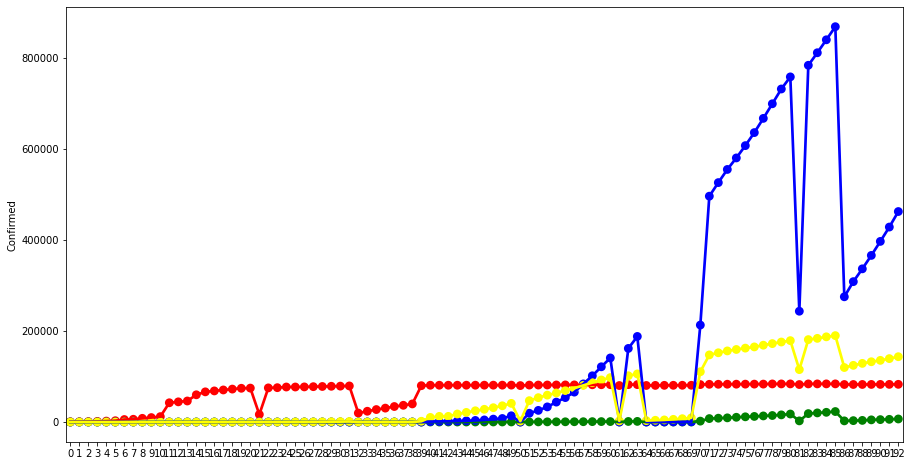

In [ ]:
plt.figure(figsize=(15,8))
sns.pointplot(china.index,china['Confirmed'],color="red")
sns.pointplot(india.index,india['Confirmed'],color="green")
sns.pointplot(us.index,us['Confirmed'],color="blue")
sns.pointplot(italy.index,italy['Confirmed'],color="yellow")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning

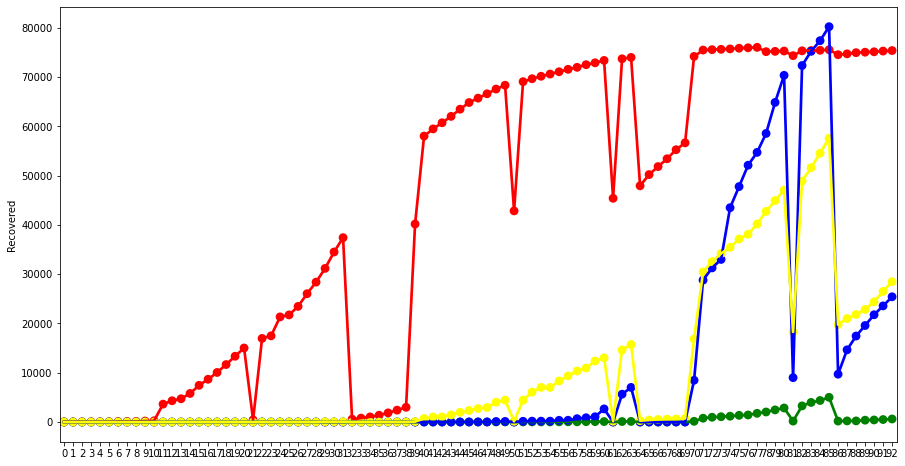

In [ ]:
plt.figure(figsize=(15,8))
sns.pointplot(china.index,china['Recovered'],color="red")
sns.pointplot(india.index,india['Recovered'],color="green")
sns.pointplot(us.index,us['Recovered'],color="blue")
sns.pointplot(italy.index,italy['Recovered'],color="yellow")
plt.show()

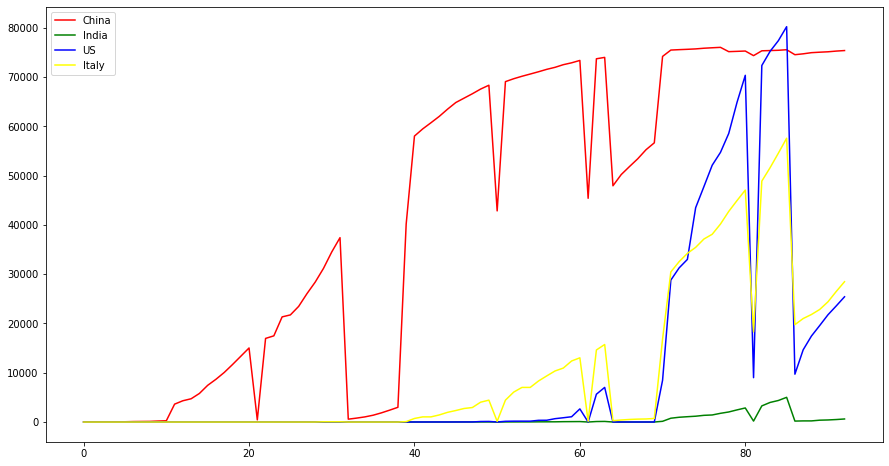

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(china.index,china['Recovered'],color="red",label="China")
plt.plot(india.index,india['Recovered'],color="green",label="India")
plt.plot(us.index,us['Recovered'],color="blue",label="US")
plt.plot(italy.index,italy['Recovered'],color="yellow",label="Italy")
plt.legend(loc=2)
plt.show()

In [ ]:
### Prediction and Forecasting

In [ ]:
# from fbprophet import Prophet

ModuleNotFoundError: ignored

In [ ]:
df.head()

,state,country,Lat,Long,Date,Confirmed,Deaths,Recovered,active
0,NaN,Afghanistan,33.0000,65.0000,1/22/20,0,0,0,0
1,NaN,Albania,41.1533,20.1683,1/22/20,0,0,0,0
2,NaN,Algeria,28.0339,1.6596,1/22/20,0,0,0,0
3,NaN,Andorra,42.5063,1.5218,1/22/20,0,0,0,0
4,NaN,Angola,-11.2027,17.8739,1/22/20,0,0,0,0


In [ ]:
### Forecasting for Confirmed Cases
confirmed = df.groupby('Date')['Confirmed'].sum().reset_index()
confirmed.head()

,Date,Confirmed
0,1/22/20,555
1,1/23/20,654
2,1/24/20,941
3,1/25/20,1434
4,1/26/20,2118


In [ ]:
confirmed.columns = ['ds','y']
confirmed.head()

,ds,y
0,1/22/20,555
1,1/23/20,654
2,1/24/20,941
3,1/25/20,1434
4,1/26/20,2118


In [ ]:
## Create Model
#m = Prophet(interval_width=0.95)

In [ ]:
# Train Model
#m.fit(confirmed)

In [ ]:
#future = m.make_future_dataframe(periods=7)
#future.tail(7)

In [ ]:
#forecast = m.predict(future)

In [ ]:
#forecast.tail(7)

In [ ]:
#forecast[['ds','yhat','yhat_lower','yhat_upper']].tail(7)

In [ ]:
#confirmed_plot = m.plot(forecast)

In [ ]:
#confirmed_weekly_plt = m.plot_components(forecast)

In [ ]:
## For India

#df_india = df[df['country']=='India']
#df_india.head()

In [ ]:
#df_india = df.query('country=="India"')
#df_india.head()

In [ ]:
#df_india_date = df_india.query('Date<="2020-03-30"')

In [ ]:
#df_india_date.tail()

### Object 02 - Assignment 

###### What's pandas?

**Question 01 :- What is pandas?**

**ANS :-**Pandas is a software library written for the Python programming language for data manipulation and analysis. In particular, it offers data structures and operations for manipulating numerical tables and time series.

###### What's TPU?

**Question :- What is TPU?**

**ANS :-** Tensor Processing Unit (TPU) is an AI accelerator application-specific integrated circuit (ASIC) developed by Google specifically for neural network machine learning, particularly using Google's own TensorFlow software

###### All dataypes in Python.


**Question :- Explain all datatype in python.**

**ANS :-**

*1 - Python Numbers*

Integers, floating point numbers and complex numbers fall under Python numbers category. They are defined as int, float and complex classes in Python.

*2- Python List*

List is an ordered sequence of items. It is one of the most used datatype in Python and is very flexible. All the items in a list do not need to be of the same type.

*3- Python Tuple* 

Tuple is an ordered sequence of items same as a list. The only difference is that tuples are immutable. Tuples once created cannot be modified.

*4- Python Strings*

String is sequence of Unicode characters. We can use single quotes or double quotes to represent strings. Multi-line strings can be denoted using triple quotes, ''' or """.

*5- Python Set*

Set is an unordered collection of unique items. Set is defined by values separated by comma inside braces { }. Items in a set are not ordered.

###### What's numpy and tensorflow py?

**Question:-** what is numpy and tensorflow py?

**Answer:-** 

NUMPY:- NumPy is the fundamental package for scientific computing in Python. It is a Python library that provides a multidimensional array object, various derived objects (such as masked arrays and matrices), and an assortment of routines for fast operations on arrays, including mathematical, logical, shape manipulation, sorting, selecting, I/O, discrete Fourier transforms, basic linear algebra, basic statistical operations, random simulation and much more.

Tensorflow:- 
It is an open source artificial intelligence library, using data flow graphs to build models. It allows developers to create large-scale neural networks with many layers. TensorFlow is mainly used for: Classification, Perception, Understanding, Discovering, Prediction and Creation.


###### What kind of libraries to be used in python for multiprocessing program?

Multiprocessing is a package that supports spawning processes using an API similar to the threading module. The multiprocessing package offers both local and remote concurrency, effectively side-stepping the Global Interpreter Lock by using subprocesses instead of threads.

Libraries are

- Ray

- MPIRE

- Dask

- ProcessPoolExecutor

- multiprocessing.Pool

- Joblib

# Lab 02 - 30th August 2022

### Object 03

#### Write a program to reveals the Hardware and Software configurations on which program is being run. 

In [ ]:
import multiprocessing as mp
print("Number of processors: ", mp.cpu_count())

Number of processors:  2


In [ ]:
import platform
 
my_system = platform.uname()
 
print(f"System: {my_system.system}")
print(f"Node Name: {my_system.node}")
print(f"Release: {my_system.release}")
print(f"Version: {my_system.version}")
print(f"Machine: {my_system.machine}")
print(f"Processor: {my_system.processor}")

System: Linux
Node Name: 24da2b36263a
Release: 5.4.188+
Version: #1 SMP Sun Apr 24 10:03:06 PDT 2022
Machine: x86_64
Processor: x86_64


### listing Local Devices

In [ ]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 5226520734131368108
 xla_global_id: -1, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14415560704
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 17888689140101960248
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
 xla_global_id: 416903419]

### Listing GPU

In [ ]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()
from tensorflow.python.client import device_lib

def get_available_gpus():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos if x.device_type == 'GPU']

get_available_gpus()

['/device:GPU:0']

In [ ]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


### GPU utilization

In [ ]:
!pip install GPUtil

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for GPUtil: filename=GPUtil-1.4.0-py3-none-any.whl size=7411 sha256=96862308cdd583f869a91e6b14188bdfb95d133e83d035979c6548a127d90c8a
  Stored in directory: /root/.cache/pip/wheels/6e/f8/83/534c52482d6da64622ddbf72cd93c35d2ef2881b78fd08ff0c
Successfully built GPUtil


In [ ]:
import GPUtil
GPUtil.showUtilization()
GPUs = GPUtil.getGPUs()

| ID | GPU | MEM |
------------------
|  0 |  0% |  2% |


### For Memory information

In [ ]:
!cat /proc/meminfo

MemTotal:       13298580 kB
MemFree:         8067088 kB
MemAvailable:   11241992 kB
Buffers:          140860 kB
Cached:          2870680 kB
SwapCached:            0 kB
Active:          2257304 kB
Inactive:        2588688 kB
Active(anon):    1474852 kB
Inactive(anon):    10704 kB
Active(file):     782452 kB
Inactive(file):  2577984 kB
Unevictable:           0 kB
Mlocked:               0 kB
SwapTotal:             0 kB
SwapFree:              0 kB
Dirty:               652 kB
Writeback:             0 kB
AnonPages:       1834432 kB
Mapped:           779124 kB
Shmem:             11460 kB
KReclaimable:     111836 kB
Slab:             172392 kB
SReclaimable:     111836 kB
SUnreclaim:        60556 kB
KernelStack:        6496 kB
PageTables:        19724 kB
NFS_Unstable:          0 kB
Bounce:                0 kB
WritebackTmp:          0 kB
CommitLimit:     6649288 kB
Committed_AS:    4798356 kB
VmallocTotal:   34359738367 kB
VmallocUsed:       52736 kB
VmallocChunk:          0 kB
Percpu:          

### CPU Time

In [ ]:
import time as t
start_time = t.time()
print("--- CPU TIME =%s seconds ---" % (t.time() - start_time))

--- CPU TIME =8.344650268554688e-05 seconds ---


### Array Sum

### Sequential Execution

In [ ]:
import time 
from timeit import default_timer as timer 
import multiprocessing as mp
import numpy as np
x = [1, 2, 3, 4] # Write input
start=timer()
y = 0 # Initialize output

for i in range(len(x)):
  y += x[i] # Add each element to the output variable

print(y) # Print output
end1=timer()-start
print("sequential time : ",end1)

10
sequential time :  0.00024359899998671608


### Execution By Chunks 

In [ ]:
import time 
from timeit import default_timer as timer 
import multiprocessing as mp
import numpy as np
x = [1, 2, 4, 4]
start=timer()
chunk1 = x[:2]
chunk2 = x[2:]

sum_1 = sum(chunk1)
sum_2 = sum(chunk2)

result = sum_1 + sum_2

print(result)
end1=timer()-start
print("time : ",end1)

11
time :  0.00022229299975151662


### Object 04

##### Explain the pool and process module with differences.



**Pool Module**
  - multiprocessing.Pool
    - Heterogeneous tasks, not homogeneous tasks.
    - Reuse processes, not single use.
    - Manage multiple tasks, not single tasks.
    - Support for task results, not fire-and-forget.
    - Check status of tasks, not opaque.

**Process Module**
  - multiprocessing.Process
    - Homogeneous tasks, not heterogeneous tasks.
    - Single-use processes, not multi-use processes.
    - Manage a single task, not manage multiple tasks.
    - No support for task results.
    - No support for checking status.

### Assignment 

- Whats matplotlib in python?

- Whats the difference between the class and module?

- What are the joint class and start class?

- What's a speed up?

- What's Sleep function in python?

- Write a sequencial and parallel(multiprocessing) program to estimate the queue of the numbers in the list. And also compares their execution time taken by using speed up and their line graph 






##### What is matplotlib in Python?
  - Matplotlib is an amazing visualization library in Python for 2D plots of arrays. Matplotlib is a multi-platform data visualization library built on NumPy arrays and designed to work with the broader SciPy stack. It was introduced by John Hunter in the year 2002.

  - One of the greatest benefits of visualization is that it allows us visual access to huge amounts of data in easily digestible visuals. Matplotlib consists of several plots like line, bar, scatter, histogram etc.

##### What are the difference btw class and module?
  - Classes
    - Classes in python act as a blueprint based on which objects are created. Objects are the very basis for object-oriented programming. The objects are the real-world entities, and class acts as a template that defines those objects.

    - These real-world entities have behavior associated with them, and classes define that behavior. A class contains variables and functions which act on the objects.
  - Modules
    - Modules in Python are files with a .py extension using which we can reuse elements inside that file. When we create a python program, the program may contain inside it functions, variables, and even classes.

    - If we want to reuse the same piece of function code or the same class, rewriting it would make our code redundant and repetitive. Instead, we can import that entire file as a module into another program.

  - Differences
    - The difference between a class and a module in python is that a class is used to define a blueprint for a given object, whereas a module is used to reuse a given piece of code inside another program.

##### What are the join class and start class?
  - The start method starts the process's activity. The join method blocks until the process whose join method is called terminates. If the timeout option is provided, it blocks at most timeout seconds. The main purpose of join() is to ensure that a child process has completed before the main process does anything that depends on the work of the child process.

##### What is SpeedUp?
  - In parallel computing, speedup refers to how much a parallel algorithm is faster than a corresponding sequential algorithm. 
  - A measure of the relative performance improvement when executing a task. Speedup can be defined by studying the different types of performance metrics such as: throughput and latency.

##### What is Sleep Function?
  - The sleep() function suspends execution of the current thread for a given number of seconds. In case of single-threaded programs, sleep() suspends execution of the thread and process. However, the function suspends a thread rather than the whole process in multithreaded programs.

# Lab 03 - 06th Sept 2022

### Object 5

##### Write a sequential and  parallel ( multiprocessing ) program to estimate the queue of the numbers in the list and also compare here execution time taken by using speedup and there line graph.

125
1860867
sequential time is  0.08046244700000216
Worker process id for 123: 119Worker process id for 5: 118

<function current_process at 0x7f3de9a30a70><function current_process at 0x7f3de9a30a70>

parallel processing time is  0.11299761399999397
[125, 1860867]
length of list :  2


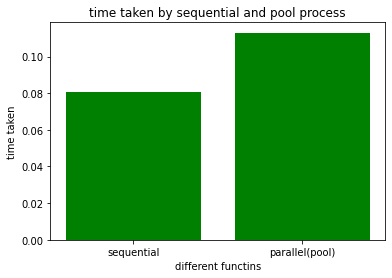

In [1]:
import multiprocessing as mp 
import os 
import time
from timeit import default_timer as timer
import matplotlib.pyplot as plt

def cube(n):
  time.sleep(0.04)
  print("Worker process id for {0}: {1}".format(n, os.getpid())) 
  print(mp.current_process)
  return (n*n*n) 
  
if __name__ == "__main__": 
    # input list 
    mylist = [5,123]
    start=timer()
    for i in mylist:
      time.sleep(0.04)
      print(i*i*i)
    end1=timer()-start
    print("sequential time is " ,end1)

    start=timer()
    # creating a pool
    p = mp.Pool()
    result = p.map(cube, mylist)
    
    end2=timer()-start
    print("parallel processing time is " ,end2)
    print(result)
    print("length of list : ",len(mylist))

    fig = plt.figure()
    t = ['sequential', 'parallel(pool)']
    exe_time = [end1,end2]
    plt.bar(t,exe_time, color ='green') 
    plt.xlabel("different functins") 
    plt.ylabel("time taken") 
    plt.title("time taken by sequential and pool process")
    plt.show()

### Sequential

In [2]:
import time
from timeit import default_timer as timer
from multiprocessing import Pool, cpu_count


def power(x, n):

    time.sleep(1)

    return x ** n


def main():

    start = timer()

    print(f'starting computations on {cpu_count()} cores')

    values = [1,2,3,4,5]
    values1=[3,3,3,3,3]
    res = list(map(power,values,values1))
    print(res)
    end = timer()
    print(f'elapsed time: {end - start}')


if __name__ == '__main__':
    main()

starting computations on 2 cores
[1, 8, 27, 64, 125]
elapsed time: 5.004775669999987


### Parallel


In [3]:
import time
from timeit import default_timer as timer
from multiprocessing import Pool, cpu_count
import sys


def power(x, n):

    time.sleep(1)

    return x ** n


def main():

    start = timer()

    print(f'starting computations on {cpu_count()} cores')

    values = ((2, 3), (4, 3), (5, 3),(6,3),(4,3))

    with Pool() as pool:
        res = pool.starmap(power, values)
        print(res)

    end = timer()
    print(f'elapsed time: {end - start}')


if __name__ == '__main__':
    main()

starting computations on 2 cores
[8, 64, 125, 216, 64]
elapsed time: 3.056145268999984


### Experimenting With Matplotlib For Optimization Comparision

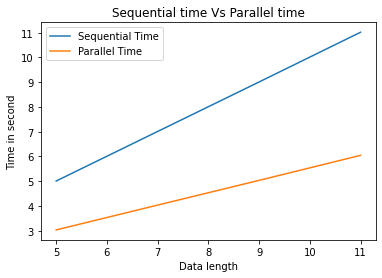

In [4]:
import matplotlib.pyplot as plt

plt.title("Sequential time Vs Parallel time")
plt.ylabel('Time in second')
plt.xlabel('Data length')

data_size = [5,7,9,11]
sequential_time = [5.007,7.009,9.009,11.019] 
parallel_time = [3.031,4.034,5.033,6.044] 
  
# Function to plot 
plt.plot(data_size,sequential_time,label="Sequential Time")
plt.plot(data_size,parallel_time,label="Parallel Time") 
  
# function to show the plot 
plt.legend() 

### Speed up Graph


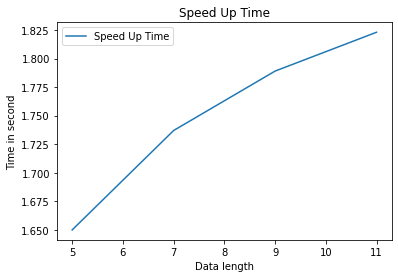

In [5]:
import matplotlib.pyplot as plt

plt.title("Speed Up Time")
plt.ylabel('Time in second')
plt.xlabel('Data length')

data_size = [5,7,9,11]
speedup_data = [1.65,1.737,1.789,1.823]
  
# Function to plot 
plt.plot(data_size,speedup_data,label="Speed Up Time")
  
# function to show the plot 
plt.legend()

# Lab 04 - 13th Sept 2022

### Object 6

##### write a program to add two matrix and store into results into the third matrix also calculate the sequencial time and parallel time. 

In [6]:
import time 
from timeit import default_timer as timer 
import multiprocessing as mp
import numpy as np
import matplotlib.pyplot as plt
import threading

X = [[1,2,3],[4 ,5,6],[7 ,8,9]] 
  
Y = [[9,8,7],[6,5,4],[3,2,1]] 
  
result = [[0,0,0],[0,0,0],[0,0,0]] 

start=timer()
for i in range(len(X)):
    for j in range(len(X[0])):
      time.sleep(0.025) 
      result[i][j] = X[i][j] + Y[i][j] 
  
for r in result: 
    print(r) 
end1=timer()-start
print("sequential time : ",end1)

[10, 10, 10]
[10, 10, 10]
[10, 10, 10]
sequential time :  0.22911412999999925


In [7]:
start=timer()
def sum(p,q):
  time.sleep(0.025)
  res=np.add(p,q)
  return res

p1=mp.Pool()
p1=map(sum,X,Y)
end2=timer()-start
print("pool time : ",end2)
start=timer()
p2=mp.Process(target=sum,args=(X,Y,))
p2.start()
p2.join()
end3=timer()-start
print("process time : ",end3)
start=timer()
p3=threading.Thread(target=sum,args=(X,Y,))
p3.start()
end4=timer()-start
print("process time : ",end4)

speed_up_pool=end1/end2
speed_up_process=end1/end3
speed_up_threading=end1/end4
print('speed_up of pool : ',speed_up_pool)
print('speed_up_process : ',speed_up_process)
print('speed_up_threading : ',speed_up_threading)


pool time :  0.015821600999998964
process time :  0.0399742860000174
process time :  0.0018188500000064778
speed_up of pool :  14.48109644529743
speed_up_process :  5.7315377690523235
speed_up_threading :  125.96647881858496


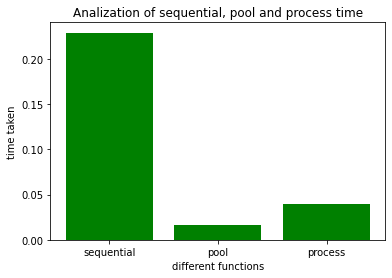

In [8]:

fig = plt.figure()
t = ['sequential', 'pool', 'process']
exe_time= [end1,end2,end3]
plt.bar(t,exe_time, color ='green') 
plt.xlabel("different functions") 
plt.ylabel("time taken") 
plt.title("Analization of sequential, pool and process time")
plt.show()

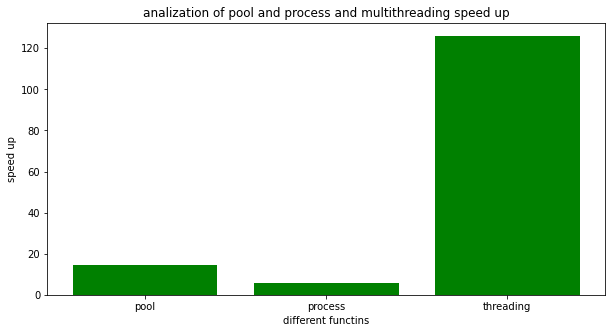

In [9]:
fig1 = plt.figure(figsize=(10,5))
t = ['pool', 'process','threading']
exe_time = [speed_up_pool,speed_up_process,speed_up_threading]
plt.bar(t,exe_time, color ='green') 
plt.xlabel("different functins") 
plt.ylabel("speed up") 
plt.title("analization of pool and process and multithreading speed up")
plt.show()


##### why we use the sleep function along with the pool but not process 

**Sleep Function** - Its a temporary waiting start

**Pool Function** - Its automatic by computer, so we need sleep() method. 

**Process Function** - manually split the data & call the join() method. 




#### why we use the start function and join with the multiprocessing model and multithreading model 

**Start Function** - Start process activities 

**Join() Function** - ensure that a child process has completed before the main process does anything that depends on the work of child process.

# Lab 05 - 20th Sept 2022

##### Object 7

##### Write a sequentialand parallel program to estimate the multiplication of the two matrix and store the result in the new matrix. And also compares their execution time taken by using speedup and their line graph?

In [10]:
import time 
from timeit import default_timer as timer
import multiprocessing as mp
import numpy as np
import matplotlib.pyplot as plt 
import threading 

In [11]:
# function with sleep time
def multiply_matrix(X,Y):
  result = [[0,0,0],[0,0,0],[0,0,0]] 
  for i in range(len(X)):
    for j in range(len(Y[0])):
        for k in range(len(Y)):
          time.sleep(0.0025)
          result[i][j] += X[i][k] * Y[k][j]
  
  for r in result: 
      print(r) 

# function without sleep time
def multiply_matrix_2(X,Y):
  result = [[0,0,0],[0,0,0],[0,0,0]] 
  for i in range(len(X)):
    for j in range(len(Y[0])):
        for k in range(len(Y)):
          result[i][j] += X[i][k] * Y[k][j]
  
  for r in result: 
      print(r) 

In [12]:
X = [[1,2,3],[4 ,5,6],[7 ,8,9]] 
Y = [[9,8,7],[6,5,4],[3,2,1]] 

In [13]:
# sequential time measurement 
start=timer()
multiply_matrix(X,Y)
end1=timer()-start
print("sequential time : ",end1)

[30, 24, 18]
[84, 69, 54]
[138, 114, 90]
sequential time :  0.0698432429999798


In [14]:
# pool time measurement 
start=timer()
p1=mp.Pool()
p1=map(multiply_matrix,X,Y)
end2=timer()-start
print("pool time : ",end2)

pool time :  0.01696218099999669


In [15]:
# process time measurement 
start=timer()
p2=mp.Process(target=multiply_matrix_2,args=(X,Y,))
p2.start()
p2.join()
end3=timer()-start
print("process time : ",end3)

[30, 24, 18]
[84, 69, 54]
[138, 114, 90]
process time :  0.03612914900003261


In [16]:
# thread time measurement 
start=timer()
p3=threading.Thread(target=multiply_matrix_2,args=(X,Y,))
p3.start()
end4=timer()-start
print("thread time : ",end4)

[30, 24, 18]thread time : 
[84, 69, 54]
[138, 114, 90]
 0.0011446789999922657


In [17]:
# speedup calculation
speed_up_pool=end1/end2
speed_up_process=end1/end3
speed_up_threading=end1/end4
print('speed_up of pool : ',speed_up_pool)
print('speed_up_process : ',speed_up_process)
print('speed_up_threading : ',speed_up_threading)

speed_up of pool :  4.117586234930132
speed_up_process :  1.9331549436693554
speed_up_threading :  61.01557117799113


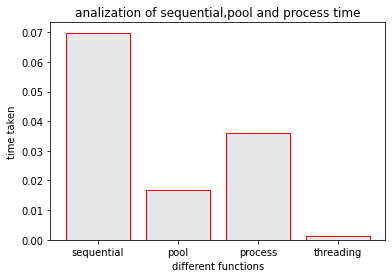

In [18]:
fig = plt.figure()
t = ['sequential', 'pool', 'process','threading']
exe_time= [end1,end2,end3,end4]
plt.bar(t,exe_time, color=(0.1, 0.1, 0.1, 0.1),  edgecolor='red') 
plt.xlabel("different functions") 
plt.ylabel("time taken") 
plt.title("analization of sequential,pool and process time")
plt.show()

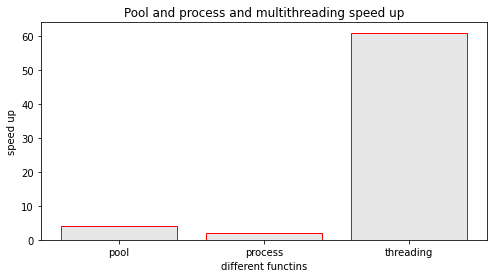

In [19]:
fig1 = plt.figure(figsize=(8,4))
t = ['pool', 'process','threading']
exe_time = [speed_up_pool,speed_up_process,speed_up_threading]
plt.bar(t,exe_time, color=(0.1, 0.1, 0.1, 0.1),  edgecolor='red') 
plt.xlabel("different functins") 
plt.ylabel("speed up") 
plt.title("Pool and process and multithreading speed up")
plt.show()

##### Object 8 

##### Write a Program to calculate Nth Fibonacci Number using sequential and Multiprocessing as well as multithreading methods.Also show the graphical representation of speedup

In [20]:
import time 
from timeit import default_timer as timer 
import multiprocessing as mp
import numpy as np
import matplotlib.pyplot as plt
import threading

In [21]:
# function with sleep time
def fibonacci(n):
   counter = 0

   first = 0
   second = 1
   temp = 0
   while counter <= n:
      # time.sleep(0.025)

      temp = first + second
      first = second
      second = temp
      counter = counter + 1
   print(first)

# function without sleep time
def fibonacci2(n):
   counter = 0

   first = 0
   second = 1
   temp = 0

   while counter <= n:
      time.sleep(0.025)
      temp = first + second
      first = second
      second = temp
      counter = counter + 1
   print(first)

In [22]:
list1 = [2,3,4,6,8,9,2,4,5,6] 

In [23]:
# sequential time measurement 
start=timer()
for i in list1:
  time.sleep(0.025)
  fibonacci2(i)
end1=timer()-start
print("sequential time : ",end1)

2
3
5
13
34
55
2
5
8
13
sequential time :  1.737677381000026


In [24]:
# pool time measurement 
start=timer()
p1=mp.Pool()
p1=map(fibonacci2,list1)
end2=timer()-start
print("pool time : ",end2)

pool time :  0.02409591600002159


In [25]:
# process time measurement 
start=timer()
for i in list1:
  p2=mp.Process(target=fibonacci,args=(i,))
  p2.start()
  p2.join()
end3=timer()-start
print("process time : ",end3)

2
3
5
13
34
55
2
5
8
13
process time :  0.1671746669999834


In [26]:
# thread time measurement 
start=timer()
for i in list1:
  p3=threading.Thread(target=fibonacci,args=(i,))
  p3.start()
  p3.join()
end4=timer()-start
print("thread time : ",end4)

2
3
5
13
34
55
2
5
8
13
thread time :  0.018641029999969305


In [27]:
# speedup calculation
speed_up_pool=end1/end2
speed_up_process=end1/end3
speed_up_threading=end1/end4
print('speed_up of pool : ',speed_up_pool)
print('speed_up_process : ',speed_up_process)
print('speed_up_threading : ',speed_up_threading)

speed_up of pool :  72.11501654464885
speed_up_process :  10.39438218830248
speed_up_threading :  93.21788447327681


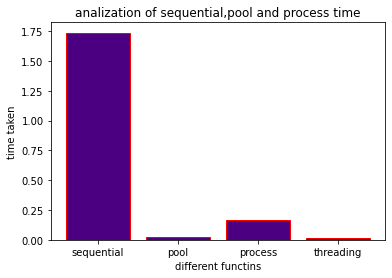

In [28]:
fig = plt.figure()
t = ['sequential', 'pool', 'process','threading']
exe_time= [end1,end2,end3,end4]
plt.bar(t,exe_time, color= 'indigo',  edgecolor='red') 
plt.xlabel("different functins") 
plt.ylabel("time taken") 
plt.title("analization of sequential,pool and process time")
plt.show()

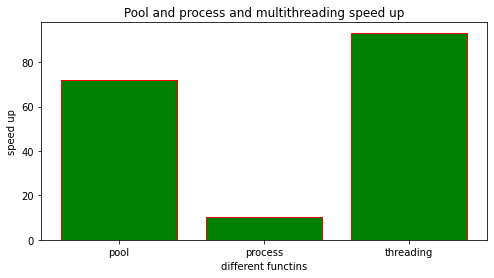

In [29]:
fig1 = plt.figure(figsize=(8,4))
t = ['pool', 'process','threading']
exe_time = [speed_up_pool,speed_up_process,speed_up_threading]
plt.bar(t,exe_time, color= 'green',  edgecolor='red') 
plt.xlabel("different functins") 
plt.ylabel("speed up") 
plt.title("Pool and process and multithreading speed up")
plt.show()

##### Object 9 

##### Write a Program to find transpose of a matrix in sequential and parallel processing and use graph to show comparisons 

In [30]:
import time 
from timeit import default_timer as timer 
import multiprocessing as mp
import numpy as np
import matplotlib.pyplot as plt
import threading
import platform
import os

In [31]:
from re import M
# with sleep function
def transposeMatrix(m):
  time.sleep(1)

  # res = [[m[j][i] for j in range(len(m))] for i in range(len(m[0]))]
  # for row in res:
  #     print(row)

  for i in range(len(m)):
   # iterate through columns
   for j in range(len(m[0])):
       result[j][i] = m[i][j]

  for r in result:
    print(r)

  

# without sleep function
def transposeMatrix2(m):
 
  # res = [[m[j][i] for j in range(len(m))] for i in range(len(m[0]))]
  # for row in res:
  #     print(row)

  for i in range(len(m)):
   # iterate through columns
   for j in range(len(m[0])):
       result[j][i] = m[i][j]

  for r in result:
    print(r)


In [32]:
m = [[1,2],[3,4],[5,6]]
result = [[0,0,0],[0,0,0]]

In [33]:
# sequential time measurement 
start=timer()
transposeMatrix(m)
end1=timer()-start
print("sequential time : ",end1)

[1, 3, 5]
[2, 4, 6]
sequential time :  1.0013270690000127


In [34]:
# pool time measurement 
start=timer()
p1=mp.Pool()
p1=map(transposeMatrix,m)
end2=timer()-start
print("pool time : ",end2)

pool time :  0.018034456000009413


In [35]:
# process time measurement 
start=timer()
p2=mp.Process(target=transposeMatrix2,args=(m,))
p2.start()
p2.join()
end3=timer()-start
print("process time : ",end3)

[1, 3, 5]
[2, 4, 6]
process time :  0.029777760999991187


In [36]:
# thread time measurement 
start=timer()
p3=threading.Thread(target=transposeMatrix2,args=(m,))
p3.start()
p3.join()
end4=timer()-start
print("thread time : ",end4)

[1, 3, 5]
[2, 4, 6]
thread time :  0.004041013000005478


In [37]:
# speedup calculation
speed_up_pool=end1/end2
speed_up_process=end1/end3
speed_up_threading=end1/end4
print('speed_up of pool : ',speed_up_pool)
print('speed_up_process : ',speed_up_process)
print('speed_up_threading : ',speed_up_threading)

speed_up of pool :  55.5229982539806
speed_up_process :  33.62667424862161
speed_up_threading :  247.79110312158247


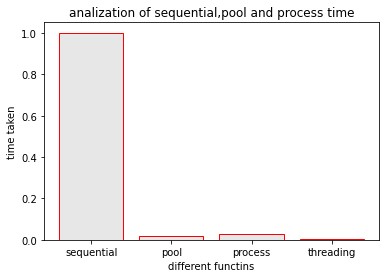

In [38]:
fig = plt.figure()
t = ['sequential', 'pool', 'process','threading']
exe_time= [end1,end2,end3,end4]
plt.bar(t,exe_time, color=(0.1, 0.1, 0.1, 0.1),  edgecolor='red') 
plt.xlabel("different functins") 
plt.ylabel("time taken") 
plt.title("analization of sequential,pool and process time")
plt.show()

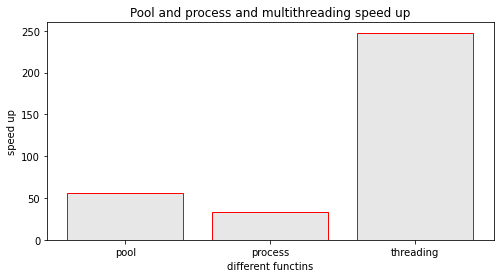

In [39]:
fig1 = plt.figure(figsize=(8,4))
t = ['pool', 'process','threading']
exe_time = [speed_up_pool,speed_up_process,speed_up_threading]
plt.bar(t,exe_time, color=(0.1, 0.1, 0.1, 0.1),  edgecolor='red') 
plt.xlabel("different functins") 
plt.ylabel("speed up") 
plt.title("Pool and process and multithreading speed up")
plt.show()

#### Object 10 

#### Write a Program to find transpose of a matrix in sequential and parallel processing and use graph to show comparisons

In [40]:
import time 
from timeit import default_timer as timer 
import multiprocessing as mp
import numpy as np
import matplotlib.pyplot as plt
import threading
import platform
import os

In [41]:
# with sleep function
def factorialFinding(n):
  time.sleep(1)

  fact = 1
  for num in range(2, n + 1):
      fact *= num
  print(f"The factorial of {n} is {fact}")
  print("\n")
  

# without sleep function
def factorialFinding2(n):

  fact = 1
  for num in range(2, n + 1):
      fact *= num
  print(f"The factorial of {n} is {fact}")
  print("\n")

In [42]:
list1 = [2,3,4,6,8,9,2,4,5,6] 

In [43]:
# sequential time measurement 
start=timer()
for i in list1:
  factorialFinding(i)
end1=timer()-start
print("sequential time : ",end1)

The factorial of 2 is 2


The factorial of 3 is 6


The factorial of 4 is 24


The factorial of 6 is 720


The factorial of 8 is 40320


The factorial of 9 is 362880


The factorial of 2 is 2


The factorial of 4 is 24


The factorial of 5 is 120


The factorial of 6 is 720


sequential time :  10.013738201000024


In [44]:
# pool time measurement 
start=timer()
p1=mp.Pool()
p1=map(factorialFinding,list1)
end2=timer()-start
print("pool time : ",end2)

pool time :  0.020728708000035567


In [45]:
# process time measurement 
start=timer()
for i in list1:
  p2=mp.Process(target=factorialFinding2,args=(i,))
  p2.start()
  p2.join()
end3=timer()-start
print("process time : ",end3)

The factorial of 2 is 2


The factorial of 3 is 6


The factorial of 4 is 24


The factorial of 6 is 720


The factorial of 8 is 40320


The factorial of 9 is 362880


The factorial of 2 is 2


The factorial of 4 is 24


The factorial of 5 is 120


The factorial of 6 is 720


process time :  0.2583962260000021


In [46]:
# thread time measurement 
start=timer()
for i in list1:
  p3=threading.Thread(target=factorialFinding2,args=(i,))
  p3.start()
  p3.join()
end4=timer()-start
print("thread time : ",end4)

The factorial of 2 is 2


The factorial of 3 is 6


The factorial of 4 is 24


The factorial of 6 is 720


The factorial of 8 is 40320


The factorial of 9 is 362880


The factorial of 2 is 2


The factorial of 4 is 24


The factorial of 5 is 120


The factorial of 6 is 720


thread time :  0.01977235900000096


In [47]:
# speedup calculation
speed_up_pool=end1/end2
speed_up_process=end1/end3
speed_up_threading=end1/end4
print('speed_up of pool : ',speed_up_pool)
print('speed_up_process : ',speed_up_process)
print('speed_up_threading : ',speed_up_threading)

speed_up of pool :  483.08549674117853
speed_up_process :  38.753422818953794
speed_up_threading :  506.4513648067758


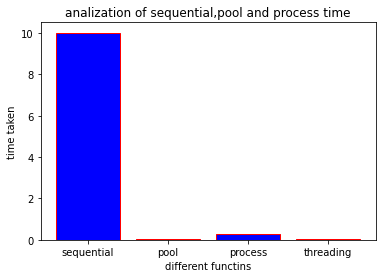

In [48]:
fig = plt.figure()
t = ['sequential', 'pool', 'process','threading']
exe_time= [end1,end2,end3,end4]
plt.bar(t,exe_time, color = 'blue', edgecolor='red') 
plt.xlabel("different functins") 
plt.ylabel("time taken") 
plt.title("analization of sequential,pool and process time")
plt.show()

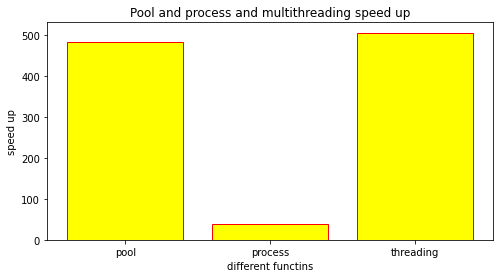

In [49]:
fig1 = plt.figure(figsize=(8,4))
t = ['pool', 'process','threading']
exe_time = [speed_up_pool,speed_up_process,speed_up_threading]
plt.bar(t,exe_time, color = 'yellow' , edgecolor='red') 
plt.xlabel("different functins") 
plt.ylabel("speed up") 
plt.title("Pool and process and multithreading speed up")
plt.show()

#### Object 11 

#### Write a Program to check if a number is Prime number or not.Use Sequential or Multiprocessing Module as well as threading module to calculate their speedup

In [50]:
import time
from timeit import default_timer as timer
import multiprocessing as mp
import numpy as np
import matplotlib.pyplot as plt
import threading

In [51]:
#function with sleep time

def prime(n) :
    flag = False

    if n > 1 :
        for i in range(2,n):
            time.sleep(0.05)
            if (n % i) == 0 :
                flag = True
                break


    if (flag) : 
        print('Not Prime') 
    else :
        print('Prime')    


#function without sleep time

def prime2(n) :
    flag = False

    if n > 1 :
        for i in range(2,n):
            if (n % i) == 0 :
                flag = True
                break

    if (flag) : 
        print('Not Prime') 
    else :
        print('Prime')
  


In [52]:
list1 = [2,3,4,8,9,10,11,31,12,24,41]

In [53]:
# Sequential Time Measurement

start = timer()
for i in list1:
    time.sleep(0.05)
    prime(i)
end1 = timer() - start
print("sequential time : ", end1) 

Prime
Prime
Not Prime
Not Prime
Not Prime
Not Prime
Prime
Prime
Not Prime
Not Prime
Prime
sequential time :  4.814365815000031


In [54]:
#pool time measurement
start = timer()
p1 = mp.Pool()
p1 = map(prime,list1)
end2 = timer() - start
print("Pool Time : ", end2)

Pool Time :  0.025164152000002105


In [55]:
# process time measurement
start = timer()
for i in list1:
    p2 = mp.Process(target=prime2,args=(i,))
    p2.start()
    p2.join()
end3 = timer() - start
print("Process time : ", end3)

Prime
Prime
Not Prime
Not Prime
Not Prime
Not Prime
Prime
Prime
Not Prime
Not Prime
Prime
Process time :  0.20396771200000785


In [56]:
# thread time measurement
start = timer()
for i in list1 :
    p3 = threading.Thread(target = prime2,args=(i,))
    p3.start()
    p3.join()
end4 = timer() - start
print("thread time : ", end4)

Prime
Prime
Not Prime
Not Prime
Not Prime
Not Prime
Prime
Prime
Not Prime
Not Prime
Prime
thread time :  0.018769835000000512


In [57]:
#speedup calculation
speed_up_pool = end1/end2
speed_up_process = end1/end3
speed_up_threading = end1/end4
print('speed_up_pool : ', speed_up_pool)
print('speed_up_process : ', speed_up_process)
print('speed_up_threading : ', speed_up_threading)

speed_up_pool :  191.3184205452116
speed_up_process :  23.603568269667335
speed_up_threading :  256.49483945915875


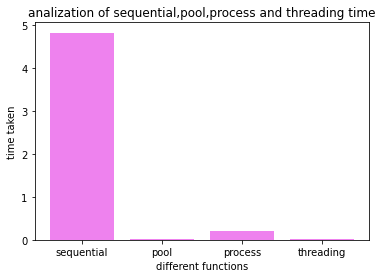

In [58]:
fig = plt.figure()
t = ['sequential', 'pool', 'process', 'threading']
exe_time = [end1,end2,end3,end4]
plt.bar(t,exe_time,color = 'violet')
plt.xlabel('different functions')
plt.ylabel('time taken')
plt.title('analization of sequential,pool,process and threading time')
plt.show()

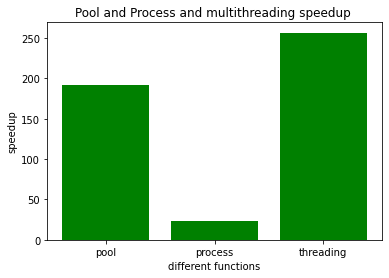

In [59]:
fig1 = plt.figure()
t = ['pool', 'process', 'threading']
exe_time = [speed_up_pool, speed_up_process, speed_up_threading]
plt.bar(t,exe_time,color='green')
plt.xlabel('different functions')
plt.ylabel('speedup')
plt.title('Pool and Process and multithreading speedup ')
plt.show()

#### Object 12 

#### Write a Program to Check if a number is even or odd. Calculate using multiprocessing and multithreading module. Also calculate their speedup and plot their graphs

In [60]:
import time
from timeit import default_timer as timer
import multiprocessing as mp
import numpy as np
import matplotlib.pyplot as plt
import threading

In [61]:
#function with sleep time 

def odd_even(n) :
  time.sleep(0.02)
  if(n%2)== 0 :
    print('even')
  else :
    print('odd')

#function without sleep time

def odd_even1(n):
    if(n%2) == 0 :
      print('even')
    else :
      print('odd')  

In [62]:
inp = [2,3,56,24,67,63,75,723,32,234584,234621]

In [63]:
# Sequential Time Measurement

start = timer()
for i in inp:
    time.sleep(0.05)
    odd_even(i)
end1 = timer() - start
print("sequential time : ", end1) 

even
odd
even
even
odd
odd
odd
odd
even
even
odd
sequential time :  0.7771276889999967


In [64]:
#pool time measurement
start = timer()
p1 = mp.Pool()
p1 = map(odd_even,inp)
end2 = timer() - start
print("Pool Time : ", end2)

Pool Time :  0.022811591999982284


In [65]:
# process time measurement
start = timer()
for i in inp:
    p2 = mp.Process(target=odd_even1,args=(i,))
    p2.start()
    p2.join()
end3 = timer() - start
print("Process time : ", end3)

even
odd
even
even
odd
odd
odd
odd
even
even
odd
Process time :  0.20963958900000534


In [66]:
# thread time measurement
start = timer()
for i in inp :
    p3 = threading.Thread(target = odd_even1,args=(i,))
    p3.start()
    p3.join()
end4 = timer() - start
print("thread time : ", end4)

even
odd
even
even
odd
odd
odd
odd
even
even
odd
thread time :  0.017323062000002665


In [67]:
#speedup calculation
speed_up_pool = end1/end2
speed_up_process = end1/end3
speed_up_threading = end1/end4
print('speed_up_pool : ', speed_up_pool)
print('speed_up_process : ', speed_up_process)
print('speed_up_threading : ', speed_up_threading)

speed_up_pool :  34.067227267636575
speed_up_process :  3.706970103819355
speed_up_threading :  44.86087326824075


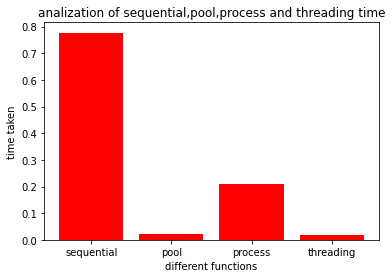

In [68]:
fig = plt.figure()
t = ['sequential', 'pool', 'process', 'threading']
exe_time = [end1,end2,end3,end4]
plt.bar(t,exe_time,color = 'red')
plt.xlabel('different functions')
plt.ylabel('time taken')
plt.title('analization of sequential,pool,process and threading time')
plt.show()

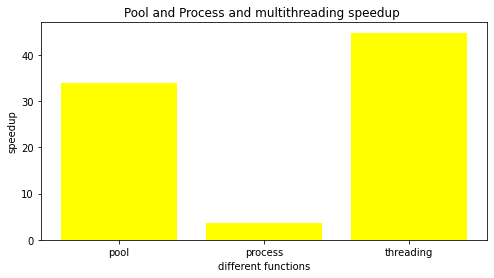

In [69]:
fig1 = plt.figure(figsize=(8,4))
t = ['pool', 'process', 'threading']
exe_time = [speed_up_pool, speed_up_process, speed_up_threading]
plt.bar(t,exe_time,color='yellow')
plt.xlabel('different functions')
plt.ylabel('speedup')
plt.title('Pool and Process and multithreading speedup ')
plt.show()

#### Object 13

#### Write a Program to check if a number or a string is palindrome. Use multiprocessing and multithreading module in your program. Also calculate speedup of different methods and plot their speedup graph.

In [70]:
import time
from timeit import default_timer as timer
import multiprocessing as mp
import numpy as np
import matplotlib.pyplot as plt
import threading

In [71]:
# function without sleep time
def pld1(s):
    s=str(s)
    if(s == s[::-1]):
        print("Palindrome")
    else:
        print("Not palindrome")



# function with sleep time
def pld(s):
    time.sleep(0.04)
    s=str(s)
    if(s == s[::-1]):
        print("Palindrome")
    else:
        print("Not Palindrome")

In [72]:
inp =[121,'sas','kiik', 2356,124,45,'none','noon',5665]

In [73]:
# Sequential Time Measurement

start = timer()
for i in inp:
    time.sleep(0.05)
    pld(i)
end1 = timer() - start
print("sequential time : ", end1) 

Palindrome
Palindrome
Palindrome
Not Palindrome
Not Palindrome
Not Palindrome
Not Palindrome
Palindrome
Palindrome
sequential time :  0.8130539380000528


In [74]:
#pool time measurement
start = timer()
p1 = mp.Pool()
p1 = map(pld,inp)
end2 = timer() - start
print("Pool Time : ", end2)

Pool Time :  0.01840612599994529


In [75]:
# process time measurement
start = timer()
for i in inp:
    p2 = mp.Process(target=pld1,args=(i,))
    p2.start()
    p2.join()
end3 = timer() - start
print("Process time : ", end3)

Palindrome
Palindrome
Palindrome
Not palindrome
Not palindrome
Not palindrome
Not palindrome
Palindrome
Palindrome
Process time :  0.1687058339999794


In [76]:
# thread time measurement
start = timer()
for i in inp :
    p3 = threading.Thread(target = pld1,args=(i,))
    p3.start()
    p3.join()
end4 = timer() - start
print("thread time : ", end4)

Palindrome
Palindrome
Palindrome
Not palindrome
Not palindrome
Not palindrome
Not palindrome
Palindrome
Palindrome
thread time :  0.014958629000034307


In [77]:
#speedup calculation
speed_up_pool = end1/end2
speed_up_process = end1/end3
speed_up_threading = end1/end4
print('speed_up_pool : ', speed_up_pool)
print('speed_up_process : ', speed_up_process)
print('speed_up_threading : ', speed_up_threading)

speed_up_pool :  44.173007291293644
speed_up_process :  4.819358754363836
speed_up_threading :  54.353506460932216


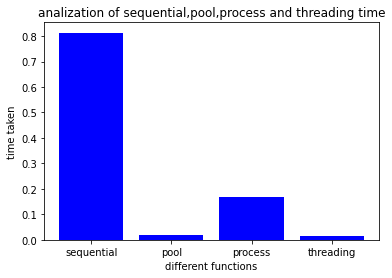

In [78]:
fig = plt.figure()
t = ['sequential', 'pool', 'process', 'threading']
exe_time = [end1,end2,end3,end4]
plt.bar(t,exe_time,color = 'blue')
plt.xlabel('different functions')
plt.ylabel('time taken')
plt.title('analization of sequential,pool,process and threading time')
plt.show()

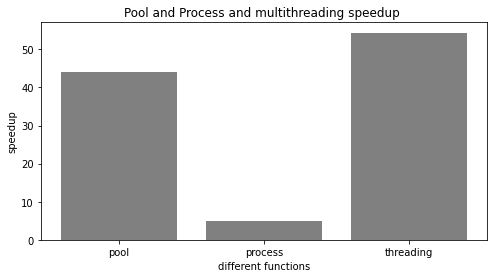

In [79]:
fig1 = plt.figure(figsize=(8,4))
t = ['pool', 'process', 'threading']
exe_time = [speed_up_pool, speed_up_process, speed_up_threading]
plt.bar(t,exe_time,color='gray')
plt.xlabel('different functions')
plt.ylabel('speedup')
plt.title('Pool and Process and multithreading speedup ')
plt.show()

#### Object 14

#### Write a sequential and parallel (multiprocessing program) to estimate the cube of the numbers in the list(array) and also compares their execution time taken by using speedup and their line graph

36
49
64
25
16
4
216
343
512
125
64
8
time taken by square   0.11352600300006088
time taken by cube   0.21877522700003738


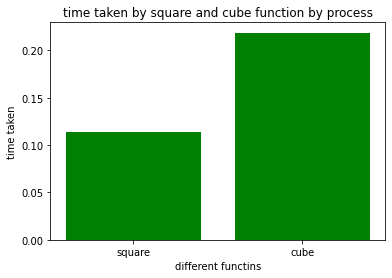

In [80]:
import multiprocessing as mp 
import os 
import time
from timeit import default_timer as timer
import matplotlib.pyplot as plt

def square(n): 
    #print("Worker process id for {0}: {1}".format(n, os.getpid())) 
    print(n*n)
def cube(n):
  print(n*n*n) 
  
if __name__ == "__main__":  
    data = [6,7,8,5,4,2,]
    start1=timer()
    for i in data:
      #creating a process class
      p1=mp.Process(target=square,args=(i,))
      p1.start()
      p1.join()
    end1=timer()-start1

    start2=timer()
    for i in data:
      #creating a process class
      p1=mp.Process(target=cube,args=(i,))
      p1.start()
      p1.join()
    end2=timer()-start1
    print("time taken by square  " ,end1)
    print("time taken by cube  " ,end2)
    fig = plt.figure()
    t = ['square', 'cube']
    exe_time = [end1,end2]
    plt.bar(t,exe_time, color ='green') 
    plt.xlabel("different functins") 
    plt.ylabel("time taken") 
    plt.title("time taken by square and cube function by process")
    plt.show()



Result is  [1, 8, 27, 64, 125]
Total Time is 0.02343720699991536
parallel processing time is  0.02343720699991536
length of list :  5


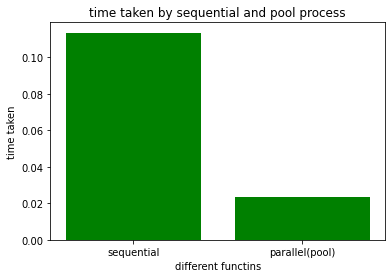

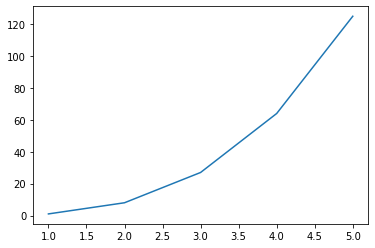

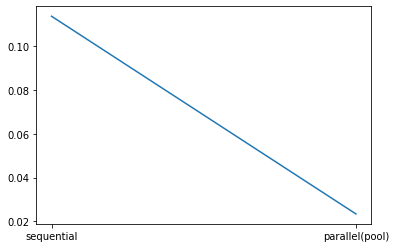

In [81]:
import multiprocessing as mp 
import os 
from timeit import default_timer as timer 
import time

def cube(n):
  return (n*n*n) 

start=timer()
# creating a list
mylist = [1,2,3,4,5]

# creating a pool
p = mp.Pool() 

# mapping and broadcasting
result = p.map(cube, mylist)
end2=timer()-start
# final result
print("Result is ",result) 
print("Total Time is",end2)
print("parallel processing time is " ,end2)
print("length of list : ",len(mylist))

fig = plt.figure()
t = ['sequential', 'parallel(pool)']
exe_time = [end1,end2]
plt.bar(t,exe_time, color ='green') 
plt.xlabel("different functins") 
plt.ylabel("time taken") 
plt.title("time taken by sequential and pool process")
plt.show()



## Function to plot 
plt.plot(mylist, result) 
  
# function to show the plot 
plt.show() 

## Function to plot line graph 
plt.plot(t, exe_time) 
  
# function to show the plot 
plt.show() 

Sequential Execution

In [82]:
import time
from timeit import default_timer as timer
from multiprocessing import Pool, cpu_count


def power(x, n):

    time.sleep(1)

    return x ** n


def main():

    start = timer()

    print(f'starting computations on {cpu_count()} cores')

    values = [1,2,3,4,5]
    values1=[3,3,3,3,3]
    res = list(map(power,values,values1))
    print(res)
    end = timer()
    print(f'elapsed time: {end - start}')


if __name__ == '__main__':
    main()

starting computations on 2 cores
[1, 8, 27, 64, 125]
elapsed time: 5.005692298999975


In [83]:
import time
from timeit import default_timer as timer
from multiprocessing import Pool, cpu_count


def power(x, n):

    time.sleep(1)

    return x ** n


def main():

    start = timer()

    print(f'starting computations on {cpu_count()} cores')

    values = [2,4,5,6,4,7,2]
    values1=[3,3,3,3,3,3,3]
    res = list(map(power,values,values1))
    print(res)
    end = timer()
    print(f'elapsed time: {end - start}')


if __name__ == '__main__':
    main()

starting computations on 2 cores
[8, 64, 125, 216, 64, 343, 8]
elapsed time: 7.007130843000027


In [84]:
import time
from timeit import default_timer as timer
from multiprocessing import Pool, cpu_count


def power(x, n):

    time.sleep(1)

    return x ** n


def main():

    start = timer()

    print(f'starting computations on {cpu_count()} cores')

    values = [2,4,5,6,4,7,2,4,5]
    values1=[3,3,3,3,3,3,3,3,3]
    res = list(map(power,values,values1))
    print(res)
    end = timer()
    print(f'elapsed time: {end - start}')


if __name__ == '__main__':
    main()

starting computations on 2 cores
[8, 64, 125, 216, 64, 343, 8, 64, 125]
elapsed time: 9.010302247000027


In [85]:
import time
from timeit import default_timer as timer
from multiprocessing import Pool, cpu_count


def power(x, n):

    time.sleep(1)

    return x ** n


def main():

    start = timer()

    print(f'starting computations on {cpu_count()} cores')

    values = [2,4,5,6,4,7,2,4,5,9,2]
    values1=[3,3,3,3,3,3,3,3,3,3,3]
    res = list(map(power,values,values1))
    print(res)
    end = timer()
    print(f'elapsed time: {end - start}')


if __name__ == '__main__':
    main()

starting computations on 2 cores
[8, 64, 125, 216, 64, 343, 8, 64, 125, 729, 8]
elapsed time: 11.011173783000004


Parallel Execution

In [86]:
import time
from timeit import default_timer as timer
from multiprocessing import Pool, cpu_count
import sys


def power(x, n):

    time.sleep(1)

    return x ** n


def main():

    start = timer()

    print(f'starting computations on {cpu_count()} cores')

    values = ((2, 3), (4, 3), (5, 3),(6,3),(4,3))

    with Pool() as pool:
        res = pool.starmap(power, values)
        print(res)

    end = timer()
    print(f'elapsed time: {end - start}')


if __name__ == '__main__':
    main()

starting computations on 2 cores
[8, 64, 125, 216, 64]
elapsed time: 3.1347900629999685


In [87]:
import time
from timeit import default_timer as timer
from multiprocessing import Pool, cpu_count
import sys


def power(x, n):

    time.sleep(1)

    return x ** n


def main():

    start = timer()

    print(f'starting computations on {cpu_count()} cores')

    values = ((2, 3), (4, 3), (5, 3),(6,3),(4,3),(7,3),(2,3))

    with Pool() as pool:
        res = pool.starmap(power, values)
        print(res)

    end = timer()
    print(f'elapsed time: {end - start}')


if __name__ == '__main__':
    main()

starting computations on 2 cores
[8, 64, 125, 216, 64, 343, 8]
elapsed time: 4.133267399000033


In [88]:
import time
from timeit import default_timer as timer
from multiprocessing import Pool, cpu_count
import sys


def power(x, n):

    time.sleep(1)

    return x ** n


def main():

    start = timer()

    print(f'starting computations on {cpu_count()} cores')

    values = ((2, 3), (4, 3), (5, 3),(6,3),(4,3),(7,3),(2,3),(4,3),(5,3))

    with Pool() as pool:
        res = pool.starmap(power, values)
        print(res)

    end = timer()
    print(f'elapsed time: {end - start}')


if __name__ == '__main__':
    main()

starting computations on 2 cores
[8, 64, 125, 216, 64, 343, 8, 64, 125]
elapsed time: 5.034206296999969


In [89]:
import time
from timeit import default_timer as timer
from multiprocessing import Pool, cpu_count
import sys


def power(x, n):

    time.sleep(1)

    return x ** n


def main():

    start = timer()

    print(f'starting computations on {cpu_count()} cores')

    values = ((2, 3), (4, 3), (5, 3),(6,3),(4,3),(7,3),(2,3),(4,3),(5,3),(9,3),(2,3))

    with Pool() as pool:
        res = pool.starmap(power, values)
        print(res)

    end = timer()
    print(f'elapsed time: {end - start}')


if __name__ == '__main__':
    main()

starting computations on 2 cores
[8, 64, 125, 216, 64, 343, 8, 64, 125, 729, 8]
elapsed time: 6.034502059000033


Experimenting With Matplotlib For Optimization Comparision

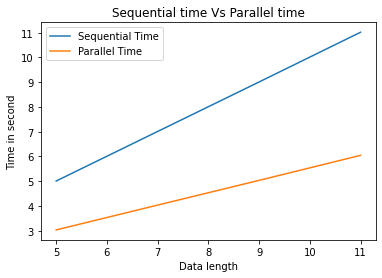

In [90]:
import matplotlib.pyplot as plt

plt.title("Sequential time Vs Parallel time")
plt.ylabel('Time in second')
plt.xlabel('Data length')

data_size = [5,7,9,11]
sequential_time = [5.007,7.009,9.009,11.019] 
parallel_time = [3.031,4.034,5.033,6.044] 
  
# Function to plot 
plt.plot(data_size,sequential_time,label="Sequential Time")
plt.plot(data_size,parallel_time,label="Parallel Time") 
  
# function to show the plot 
plt.legend() 

Speedup Graph

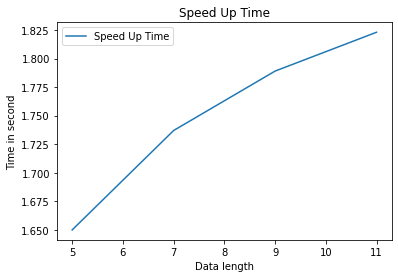

In [91]:
import matplotlib.pyplot as plt

plt.title("Speed Up Time")
plt.ylabel('Time in second')
plt.xlabel('Data length')

data_size = [5,7,9,11]
speedup_data = [1.65,1.737,1.789,1.823]
  
# Function to plot 
plt.plot(data_size,speedup_data,label="Speed Up Time")
  
# function to show the plot 
plt.legend()